# CS4035 - Cyber Data Analytics
## Lab 4

### Submit on brightspace (zip file with the name Group_xx.zip)
This jupyter file completed with code, plots, figures and report for each question. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.

(if you used hard-to-get libraries) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## README

Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

In [81]:
import os
import nbformat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple
from rich.table import Table
from rich.progress import track
from rich.console import Console
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [82]:
# If this cell does not work try running ``
nb = nbformat.read("Lab4.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 864


## 1. Preparation (0 points)

### 1a. Load the dataset and split it into a train and test set

In [83]:
data_X_path = os.path.join(os.getcwd(), "data", "X.npy")
data_y_path = os.path.join(os.getcwd(), "data", "y.npy")
features_path = os.path.join(os.getcwd(), "data", "feature_names.csv")

X = np.load(data_X_path)
y = np.load(data_y_path)

df_feats = pd.read_csv(features_path)

In [84]:
X.shape

(30396, 22761)

In [85]:
data = np.c_[X, y]
data.shape

(30396, 22762)

In [86]:
features = df_feats['feature_name'].tolist()
features.append('label')
df = pd.DataFrame(data=data, columns=features)
df

,kernel32.dll:SetFileTime,kernel32.dll:CompareFileTime,kernel32.dll:SearchPathW,kernel32.dll:GetShortPathNameW,kernel32.dll:GetFullPathNameW,kernel32.dll:MoveFileW,kernel32.dll:SetCurrentDirectoryW,kernel32.dll:GetFileAttributesW,kernel32.dll:GetLastError,kernel32.dll:CreateDirectoryW,...,msvcrt.dll:_wrmdir,wsock32.dll:ntohl,msvcr100.dll:_ismbblead,msvcr100.dll:_acmdln,secur32.dll:LsaFreeReturnBuffer,gdiplus.dll:GdipEmfToWmfBits,gdiplus.dll:GdipAddPathLine2,gdiplus.dll:GdipGetRegionBoundsI,gdiplus.dll:GdipSetPenLineJoin,label
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30391,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30392,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
30393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30394,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
split_data = train_test_split(X, y, test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = split_data

## 2. Attacking linear models (5 Points)

### 2a. Implementing useless import attacks

#### Training regular SGD Classifier

-- Epoch 1
Norm: 147.51, NNZs: 8949, Bias: 9.236085, T: 13678, Avg. loss: 16.160503
Total training time: 0.83 seconds.
-- Epoch 2
Norm: 92.65, NNZs: 8962, Bias: 4.048216, T: 27356, Avg. loss: 2.986621
Total training time: 1.66 seconds.
-- Epoch 3
Norm: 70.29, NNZs: 8962, Bias: 2.521127, T: 41034, Avg. loss: 1.680364
Total training time: 2.53 seconds.
-- Epoch 4
Norm: 59.10, NNZs: 8962, Bias: 2.306985, T: 54712, Avg. loss: 1.234767
Total training time: 3.38 seconds.
-- Epoch 5
Norm: 51.53, NNZs: 8962, Bias: 2.109058, T: 68390, Avg. loss: 0.933499
Total training time: 4.25 seconds.
-- Epoch 6
Norm: 45.79, NNZs: 8962, Bias: 2.229654, T: 82068, Avg. loss: 0.746832
Total training time: 5.11 seconds.
-- Epoch 7
Norm: 41.15, NNZs: 8962, Bias: 1.924825, T: 95746, Avg. loss: 0.620394
Total training time: 5.95 seconds.
-- Epoch 8
Norm: 37.65, NNZs: 8962, Bias: 2.123623, T: 109424, Avg. loss: 0.519264
Total training time: 6.76 seconds.
-- Epoch 9
Norm: 34.80, NNZs: 8962, Bias: 1.986571, T: 123102

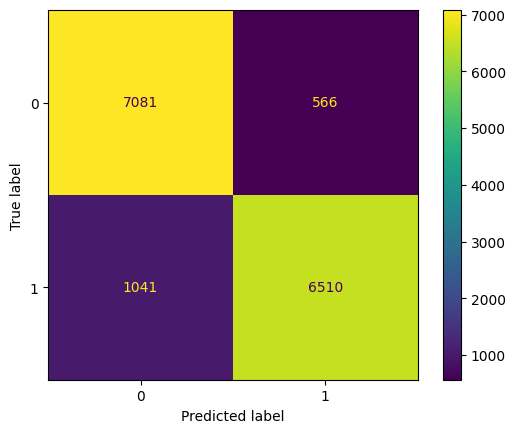

In [88]:
sgd_clf = SGDClassifier(loss="log_loss", random_state=0, early_stopping=True, n_jobs=-1, verbose=1)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [89]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()

accuracy_regular = accuracy_score(y_test, y_pred)
print('True Positive:', tp)
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print("Accuracy:", accuracy_regular)

True Positive: 6510
True Negative: 7081
False Positive: 566
False Negative: 1041
Accuracy: 0.8942624029477563


#### Applying evasion attack on the SGD Classifier

In [90]:
def evade(sample: np.ndarray, coef: np.ndarray) -> np.ndarray:
    """Applies an evation attack where when a coefficient is negative,
    change the sample's value for that index to 1.

    Args:
        sample (np.ndarray): data saples of 0s and 1s
        coef (np.ndarray): coefficient values of the originally trained model.

    Returns:
        np.ndarray: evasion attack sample
    """
    sample_copy = sample.copy()
    mask = coef < 0
    sample_copy[mask] = 1
    return sample_copy

In [91]:
malicious_indices = np.where(y_test == 1)[0]
X_test_evaded = X_test.copy()

coef_arr = sgd_clf.coef_[0]

for i in range(len(X_test_evaded)):
    if y_test[i] == 1:
        X_test_evaded[i] = evade(X_test_evaded[i], coef_arr)
X_test_evaded

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int8)

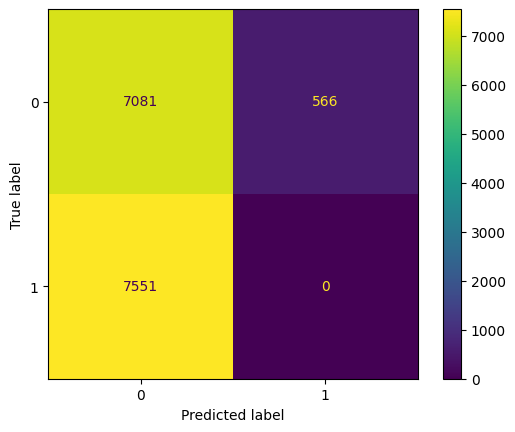

In [92]:
y_pred_evaded = sgd_clf.predict(X_test_evaded)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded)
plt.show()

In [93]:
accuracy_evaded = accuracy_score(y_test, y_pred_evaded)
drop = 1.0 - (accuracy_evaded / accuracy_regular)
drop * 100

47.8993451548819

In [94]:
table = Table(title="SGDClassifier scores on an attacked model")
table.add_column("Evasion Attack", justify="center", style="cyan")
table.add_column("Accuracy", style="magenta")
table.add_column("Precision", style="magenta")
table.add_column("Recall", style="magenta")
table.add_column("F1", style="magenta")
table.add_column("TP", style="green")
table.add_column("TN", style="green")
table.add_column("FP", style="green")
table.add_column("FN", style="green")

types = ["No", "Yes"]
preds_type = [y_pred, y_pred_evaded]

for i, type_test in enumerate(types):
    tn, fp, fn, tp = confusion_matrix(y_test, preds_type[i], labels=[0, 1]).ravel()
    acc = accuracy_score(y_test, preds_type[i])
    precision = precision_score(y_test, preds_type[i])
    recall = recall_score(y_test, preds_type[i])
    f1_res = f1_score(y_test, preds_type[i])
    res_tuple = (type_test, f"{acc:.3f}", f"{precision:.3f}", f"{recall:.3f}", f"{f1_res:.3f}", f"{tp}", f"{tn}", f"{fp}", f"{fn}")
    table.add_row(*res_tuple)

console = Console()
console.print(table)

                      SGDClassifier scores on an attacked model                      
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┓
┃ Evasion Attack ┃ Accuracy ┃ Precision ┃ Recall ┃ F1    ┃ TP   ┃ TN   ┃ FP  ┃ FN   ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━╇━━━━━━┩
│       No       │ 0.894    │ 0.920     │ 0.862  │ 0.890 │ 6510 │ 7081 │ 566 │ 1041 │
│      Yes       │ 0.466    │ 0.000     │ 0.000  │ 0.000 │ 0    │ 7081 │ 566 │ 7551 │
└────────────────┴──────────┴───────────┴────────┴───────┴──────┴──────┴─────┴──────┘

### 2b. Analysis and answers to the questions

For the AdvML dataset, we gave a balanced split of 50/50, just like the original paper. We implemented the `evade` function such that when the coefficient is negative, we change the position in the sample to 1.

From the performed experiments, we can see that the classifier is not robust against such attacks as the accuracy has dropped by ~48% and has accuracy of ~46.6%. The model could not detect any True Positives (malicious in prediction and reality). The malicious files started not being caught and hence were moved to the False Negative category. This is because neural networks are susceptible to small changes not present in the original dataset. It could not have seen these, and it is unreasonable to ask for it to learn 2<sup>22761</sup> combinations.

## 3. Improving robustness by hardening (5 Points)

### 3a. Implementing hardening

In [95]:
malicious_indices = np.where(y_test == 1)[0]
X_train_harden = np.zeros((len(malicious_indices), X_train.shape[1]))
y_train_harden = np.ones(len(malicious_indices))

for i, idx in enumerate(malicious_indices):
    X_train_harden[i] = evade(X_train[idx], coef_arr)

In [96]:
sgd_clf = SGDClassifier(loss="log_loss", random_state=0, early_stopping=True, n_jobs=-1, verbose=1)
sgd_clf.fit(X_train, y_train)
sgd_clf.partial_fit(X_train_harden, y_train_harden)

-- Epoch 1
Norm: 147.51, NNZs: 8949, Bias: 9.236085, T: 13678, Avg. loss: 16.160503
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 92.65, NNZs: 8962, Bias: 4.048216, T: 27356, Avg. loss: 2.986621
Total training time: 1.63 seconds.
-- Epoch 3
Norm: 70.29, NNZs: 8962, Bias: 2.521127, T: 41034, Avg. loss: 1.680364
Total training time: 2.46 seconds.
-- Epoch 4
Norm: 59.10, NNZs: 8962, Bias: 2.306985, T: 54712, Avg. loss: 1.234767
Total training time: 3.29 seconds.
-- Epoch 5
Norm: 51.53, NNZs: 8962, Bias: 2.109058, T: 68390, Avg. loss: 0.933499
Total training time: 4.13 seconds.
-- Epoch 6
Norm: 45.79, NNZs: 8962, Bias: 2.229654, T: 82068, Avg. loss: 0.746832
Total training time: 4.96 seconds.
-- Epoch 7
Norm: 41.15, NNZs: 8962, Bias: 1.924825, T: 95746, Avg. loss: 0.620394
Total training time: 5.78 seconds.
-- Epoch 8
Norm: 37.65, NNZs: 8962, Bias: 2.123623, T: 109424, Avg. loss: 0.519264
Total training time: 6.60 seconds.
-- Epoch 9
Norm: 34.80, NNZs: 8962, Bias: 1.986571, T: 123102

SGDClassifier(early_stopping=True, loss='log_loss', n_jobs=-1, random_state=0,
              verbose=1)

#### Test with and without evasion

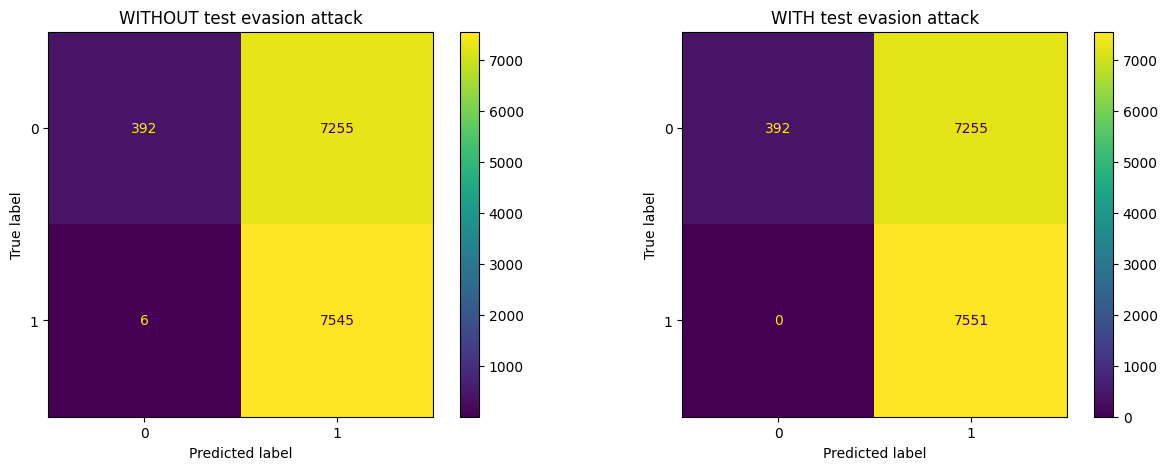

In [97]:
y_pred = sgd_clf.predict(X_test)
y_pred_evaded = sgd_clf.predict(X_test_evaded)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax1)
ax1.set_title('WITHOUT test evasion attack')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded, ax=ax2)
ax2.set_title('WITH test evasion attack')
plt.show()

In [98]:
table = Table(title="SGDClassifier Test with data without and with evasion attack")
table.add_column("Evasion Attack", justify="center", style="cyan")
table.add_column("Accuracy", style="magenta")
table.add_column("Precision", style="magenta")
table.add_column("Recall", style="magenta")
table.add_column("F1", style="magenta")
table.add_column("TP", style="green")
table.add_column("TN", style="green")
table.add_column("FP", style="green")
table.add_column("FN", style="green")

types = ["No", "Yes"]
preds_type = [y_pred, y_pred_evaded]

for i, type_test in enumerate(types):
    tn, fp, fn, tp = confusion_matrix(y_test, preds_type[i], labels=[0, 1]).ravel()
    acc = accuracy_score(y_test, preds_type[i])
    precision = precision_score(y_test, preds_type[i])
    recall = recall_score(y_test, preds_type[i])
    f1_res = f1_score(y_test, preds_type[i])
    res_tuple = (type_test, f"{acc:.3f}", f"{precision:.3f}", f"{recall:.3f}", f"{f1_res:.3f}", f"{tp}", f"{tn}", f"{fp}", f"{fn}")
    table.add_row(*res_tuple)

console = Console()
console.print(table)

           SGDClassifier Test with data without and with evasion attack            
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━┳━━━━━━┳━━━━┓
┃ Evasion Attack ┃ Accuracy ┃ Precision ┃ Recall ┃ F1    ┃ TP   ┃ TN  ┃ FP   ┃ FN ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━╇━━━━━━╇━━━━┩
│       No       │ 0.522    │ 0.510     │ 0.999  │ 0.675 │ 7545 │ 392 │ 7255 │ 6  │
│      Yes       │ 0.523    │ 0.510     │ 1.000  │ 0.675 │ 7551 │ 392 │ 7255 │ 0  │
└────────────────┴──────────┴───────────┴────────┴───────┴──────┴─────┴──────┴────┘

### 3b. Analysis and answers to the questions

After applying evation to the train dataset, we can see that when comparing to a non-attacked model (from exercise 2) the regular test accuracy dropped to ~55.2% from ~89.4%, while on the evaded dataset, the increased to ~55.3% compared to ~46.6% before. When hardening the test set, we can see that the False Negatives reduced from a very small amount (6 samples) to 0 False Negatives. This means that by adding evation attacks attacks help to improve the accuracy very slightly and catch all or most of the malitious files. However, as seen in this methods decreases the precision significantly (when comparing to a non-attacked model) which means that a lot of benign samples are classified as malitious. In practice, this would mean that there would be a lot of false alarms being raised which contributes to the Cyber-Security Analyst's alert fatigue.

## 4. Training non-negative linear models (5 Points)

### 4a. Implement non-negative logistic regression using SGD

In [99]:
def weight_clip(weights: np.ndarray) -> np.ndarray:
    """Clips weights to be non-negative.

    Args:
        weights (np.ndarray): 1D array of weights to clip

    Returns:
        np.ndarray: non-negative weights
    """
    return np.maximum(weights, 0.0)


def train_sdg_classifier(hardened_data: Tuple[np.ndarray, np.ndarray], epochs=20, batch_size=None, verbose=1) -> SGDClassifier:
    """Train a SGD classifier with clipped weights.

    Args:
        hardened_data (Tuple[np.ndarray, np.ndarray]): tuple of X and y data

    Returns:
        SGDClassifier: trained SGD classifier
    """
    X, y = hardened_data[0].copy(), hardened_data[1].copy()
    if batch_size is None:
        batch_size = len(X)
    clf = SGDClassifier(loss="log_loss", random_state=0, n_jobs=-1, verbose=verbose)
    for i in range(epochs):
        X, y = shuffle(X, y, random_state=i)
        for j in track(range(0, len(X), batch_size), description=f"EPOCH: {i+1}/{epochs}"):
            clf.partial_fit(X[j:j+batch_size], y[j:j+batch_size], classes=[0, 1])
            clf.coef_[0] = weight_clip(clf.coef_[0])
        y_pred = clf.predict(X)
        print("Accuracy:", accuracy_score(y, y_pred))
        print("=================================")
    return clf

In [100]:
clipped_sgd_clf = train_sdg_classifier((X_train, y_train))

Output()

-- Epoch 1

Norm: 144.02, NNZs: 9754, Bias: 8.714221, T: 15198, Avg. loss: 13.773187

Total training time: 1.08 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 80.23, NNZs: 9757, Bias: 2.067864, T: 15198, Avg. loss: 2.806732

Total training time: 1.06 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 57.85, NNZs: 9757, Bias: 1.021379, T: 15198, Avg. loss: 1.645840

Total training time: 1.08 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 47.05, NNZs: 9757, Bias: 1.429104, T: 15198, Avg. loss: 1.175656

Total training time: 1.07 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 39.77, NNZs: 9757, Bias: 0.950048, T: 15198, Avg. loss: 0.911765

Total training time: 1.02 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 34.46, NNZs: 9757, Bias: 1.045332, T: 15198, Avg. loss: 0.727962

Total training time: 1.36 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 31.33, NNZs: 9757, Bias: 0.725206, T: 15198, Avg. loss: 0.619349

Total training time: 0.97 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 28.62, NNZs: 9757, Bias: 0.544828, T: 15198, Avg. loss: 0.556631

Total training time: 1.20 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 26.60, NNZs: 9757, Bias: 0.428346, T: 15198, Avg. loss: 0.500480

Total training time: 1.31 seconds.

Output()

-- Epoch 1

Norm: 24.82, NNZs: 9757, Bias: 0.428017, T: 15198, Avg. loss: 0.452685

Total training time: 1.40 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 23.28, NNZs: 9757, Bias: 0.753357, T: 15198, Avg. loss: 0.416367

Total training time: 1.22 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 22.19, NNZs: 9757, Bias: 0.538351, T: 15198, Avg. loss: 0.373531

Total training time: 1.20 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 21.16, NNZs: 9757, Bias: 0.281087, T: 15198, Avg. loss: 0.344714

Total training time: 1.15 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 20.36, NNZs: 9757, Bias: 0.468330, T: 15198, Avg. loss: 0.334721

Total training time: 1.12 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 19.62, NNZs: 9757, Bias: 0.315484, T: 15198, Avg. loss: 0.315775

Total training time: 1.15 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 19.00, NNZs: 9757, Bias: 0.446390, T: 15198, Avg. loss: 0.302517

Total training time: 1.23 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 18.53, NNZs: 9757, Bias: 0.283936, T: 15198, Avg. loss: 0.293915

Total training time: 1.49 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 18.18, NNZs: 9757, Bias: 0.344251, T: 15198, Avg. loss: 0.289315

Total training time: 1.51 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 17.77, NNZs: 9757, Bias: 0.272463, T: 15198, Avg. loss: 0.278791

Total training time: 1.47 seconds.

Output()

Accuracy: 0.5039478878799842


-- Epoch 1

Norm: 17.47, NNZs: 9757, Bias: 0.163253, T: 15198, Avg. loss: 0.270320

Total training time: 1.07 seconds.

Accuracy: 0.5039478878799842


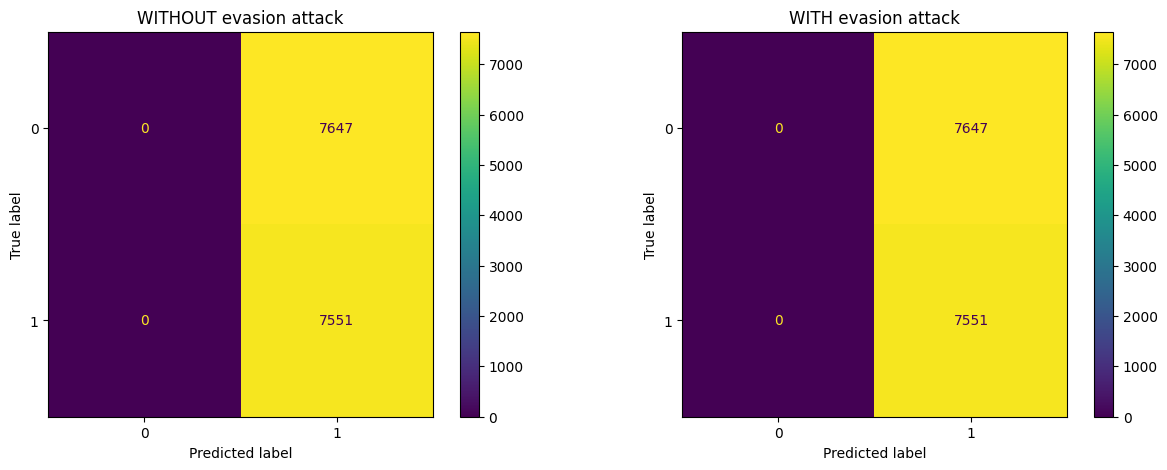

In [101]:
y_pred = clipped_sgd_clf.predict(X_test)
y_pred_evaded = clipped_sgd_clf.predict(X_test_evaded)

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax1)
ax1.set_title('WITHOUT evasion attack')
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded, ax=ax2)
ax2.set_title('WITH evasion attack')
plt.show()

In [102]:
table = Table(title="SGDClassifier Test with data without and with evasion attack")
table.add_column("Evasion Attack", justify="center", style="cyan")
table.add_column("Accuracy", style="magenta")
table.add_column("Precision", style="magenta")
table.add_column("Recall", style="magenta")
table.add_column("F1", style="magenta")
table.add_column("TP", style="green")
table.add_column("TN", style="green")
table.add_column("FP", style="green")
table.add_column("FN", style="green")

types = ["No", "Yes"]
preds_type = [y_pred, y_pred_evaded]

for i, type_test in enumerate(types):
    tn, fp, fn, tp = confusion_matrix(y_test, preds_type[i], labels=[0, 1]).ravel()
    acc = accuracy_score(y_test, preds_type[i])
    precision = precision_score(y_test, preds_type[i])
    recall = recall_score(y_test, preds_type[i])
    f1_res = f1_score(y_test, preds_type[i])
    res_tuple = (type_test, f"{acc:.3f}", f"{precision:.3f}", f"{recall:.3f}", f"{f1_res:.3f}", f"{tp}", f"{tn}", f"{fp}", f"{fn}")
    table.add_row(*res_tuple)

console = Console()
console.print(table)

           SGDClassifier Test with data without and with evasion attack           
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━┳━━━━━━┳━━━━┓
┃ Evasion Attack ┃ Accuracy ┃ Precision ┃ Recall ┃ F1    ┃ TP   ┃ TN ┃ FP   ┃ FN ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━╇━━━━━━╇━━━━┩
│       No       │ 0.497    │ 0.497     │ 1.000  │ 0.664 │ 7551 │ 0  │ 7647 │ 0  │
│      Yes       │ 0.497    │ 0.497     │ 1.000  │ 0.664 │ 7551 │ 0  │ 7647 │ 0  │
└────────────────┴──────────┴───────────┴────────┴───────┴──────┴────┴──────┴────┘

#### Batch based training

In [104]:
batch_sizes = [8, 16, 32, 64, 128, 256, 512, 1024]

trained_models = []
for batch_size in batch_sizes:
    print()
    print(f"+++++++++++++++++Train on batch_size={batch_size}+++++++++++++++++")
    print()
    trained_models.append(train_sdg_classifier((X_train, y_train), batch_size=batch_size, verbose=0))


+++++++++++++++++Train on batch_size=8+++++++++++++++++



Output()

Output()

Accuracy: 0.7402289774970391


Output()

Accuracy: 0.8366232398999869


Output()

Accuracy: 0.7198973549151204


Output()

Accuracy: 0.8557704961179102


Output()

Accuracy: 0.8583366232399


Output()

Accuracy: 0.8140544808527438


Output()

Accuracy: 0.8265561258060271


Output()

Accuracy: 0.8634030793525463


Output()

Accuracy: 0.8590604026845637


Output()

Accuracy: 0.8513620213185945


Output()

Accuracy: 0.8602447690485591


Output()

Accuracy: 0.8675483616265298


Output()

Output()

Accuracy: 0.8155678378734044


Output()

Accuracy: 0.8514278194499276


Output()

Accuracy: 0.8662981971312015


Output()

Accuracy: 0.8572838531385709


Output()

Accuracy: 0.8703776812738518


Output()

Accuracy: 0.8603763653112252


Output()

Accuracy: 0.8671535728385313

+++++++++++++++++Train on batch_size=16+++++++++++++++++



Output()

Accuracy: 0.555270430319779


Output()

Accuracy: 0.6156073167522043


Output()

Output()

Accuracy: 0.8716278457691802


Output()

Accuracy: 0.8320173707066719


Output()

Accuracy: 0.8420186866692986


Output()

Accuracy: 0.821818660350046


Output()

Output()

Accuracy: 0.8580734307145677


Output()

Accuracy: 0.8576128437952362


Output()

Output()

Accuracy: 0.8655086195552046


Output()

Accuracy: 0.8512304250559284


Output()

Accuracy: 0.8175417818133965


Output()

Output()

Accuracy: 0.8709040663245163


Output()

Output()

Accuracy: 0.8700486906171865


Output()

Accuracy: 0.862152914857218


Output()

Accuracy: 0.8675483616265298

+++++++++++++++++Train on batch_size=32+++++++++++++++++



Output()

Accuracy: 0.6806816686406106


Output()

Accuracy: 0.8036583761021187


Output()

Accuracy: 0.6982497697065403


Output()

Accuracy: 0.8408343203053034


Output()

Accuracy: 0.7595736281089617


Output()

Accuracy: 0.7892485853401764


Output()

Accuracy: 0.6939070930385577


Output()

Accuracy: 0.8154362416107382


Output()

Output()

Output()

Accuracy: 0.8691275167785235


Output()

Accuracy: 0.8408343203053034


Output()

Accuracy: 0.8524805895512567


Output()

Output()

Accuracy: 0.8421502829319647


Output()

Accuracy: 0.8653112251612054


Output()

Accuracy: 0.8499802605606


Output()

Accuracy: 0.8683379392025267


Output()

Output()

Accuracy: 0.8657718120805369

+++++++++++++++++Train on batch_size=64+++++++++++++++++



Output()

Accuracy: 0.526253454401895


Output()

Accuracy: 0.6889722331885775


Output()

Accuracy: 0.7323989998684037


Output()

Accuracy: 0.8043821555467825


Output()

Accuracy: 0.7435188840636926


Output()

Accuracy: 0.7985919199894723


Output()

Accuracy: 0.6921305434925649


Output()

Accuracy: 0.7760889590735623


Output()

Accuracy: 0.8409001184366364


Output()

Accuracy: 0.7544413738649822


Output()

Output()

Accuracy: 0.8128701144887486


Output()

Accuracy: 0.8138570864587445


Output()

Output()

Accuracy: 0.8426108698512962


Output()

Accuracy: 0.8514936175812607


Output()

Accuracy: 0.8017502302934597


Output()

Accuracy: 0.8527437820765891


Output()

Accuracy: 0.8203053033293854


Output()

Accuracy: 0.8507698381365969

+++++++++++++++++Train on batch_size=128+++++++++++++++++



Output()

Accuracy: 0.5003947887879984


Output()

Accuracy: 0.5210554020265824


Output()

Accuracy: 0.5636267929990788


Output()

Accuracy: 0.5232925384919068


Output()

Accuracy: 0.5407948414265035


Output()

Output()

Output()

Accuracy: 0.6933807079878932


Output()

Accuracy: 0.5965916567969469


Output()

Accuracy: 0.7601658112909593


Output()

Accuracy: 0.7658244505856033


Output()

Accuracy: 0.7253585998157652


Output()

Accuracy: 0.7287801026450849


Output()

Accuracy: 0.775759968416897


Output()

Accuracy: 0.7793788656402159


Output()

Accuracy: 0.7771417291748914


Output()

Output()

Accuracy: 0.7740492170022372


Output()

Accuracy: 0.8194499276220555


Output()

Accuracy: 0.7879984208448481

+++++++++++++++++Train on batch_size=256+++++++++++++++++



Output()

Accuracy: 0.5044084747993157


Output()

Accuracy: 0.5055928411633109


Output()

Accuracy: 0.539413080668509


Output()

Accuracy: 0.5195420450059218


Output()

Accuracy: 0.5231609422292407


Output()

Accuracy: 0.5280300039478879


Output()

Accuracy: 0.5999473614949336


Output()

Accuracy: 0.5736281089617055


Output()

Accuracy: 0.5529016975917884


Output()

Accuracy: 0.6075141465982367


Output()

Accuracy: 0.705487564153178


Output()

Accuracy: 0.7036452164758521


Output()

Accuracy: 0.5968548493222793


Output()

Accuracy: 0.5952756941702856


Output()

Accuracy: 0.7168706408737991


Output()

Output()

Output()

Accuracy: 0.6091590998815634


Output()

Accuracy: 0.7690485590209238


Output()

Accuracy: 0.773917620739571

+++++++++++++++++Train on batch_size=512+++++++++++++++++



Output()

Accuracy: 0.5240821160679037


Output()

Output()

Accuracy: 0.5086195552046322


Output()

Accuracy: 0.5095407290432952


Output()

Output()

Accuracy: 0.5137518094486117


Output()

Accuracy: 0.5247400973812344


Output()

Accuracy: 0.5533622845111199


Output()

Accuracy: 0.5080273720226346


Output()

Output()

Accuracy: 0.5427687853664956


Output()

Accuracy: 0.5535596789051191


Output()

Accuracy: 0.5421108040531649


Output()

Output()

Accuracy: 0.5717199631530464


Output()

Accuracy: 0.5888932754309778


Output()

Output()

Accuracy: 0.5786287669430188


Output()

Accuracy: 0.5822476641663377


Output()

Accuracy: 0.5921831819976313

+++++++++++++++++Train on batch_size=1024+++++++++++++++++



Output()

Accuracy: 0.5039478878799842


Output()

Output()

Accuracy: 0.5034873009606528


Output()

Accuracy: 0.5040136860113172


Output()

Accuracy: 0.5146729832872746


Output()

Accuracy: 0.5103961047506251


Output()

Accuracy: 0.5039478878799842


Output()

Accuracy: 0.5232267403605737


Output()

Accuracy: 0.5023029345966574


Output()

Accuracy: 0.5167127253585998


Output()

Accuracy: 0.5264508487958942


Output()

Accuracy: 0.5273062245032241


Output()

Accuracy: 0.5271746282405579


Output()

Accuracy: 0.5232267403605737


Output()

Accuracy: 0.529082774049217


Output()

Accuracy: 0.5264508487958942


Output()

Accuracy: 0.5279642058165548


Output()

Accuracy: 0.5265824450585603


Output()

Accuracy: 0.5292143703118831


Accuracy: 0.5471114620344782


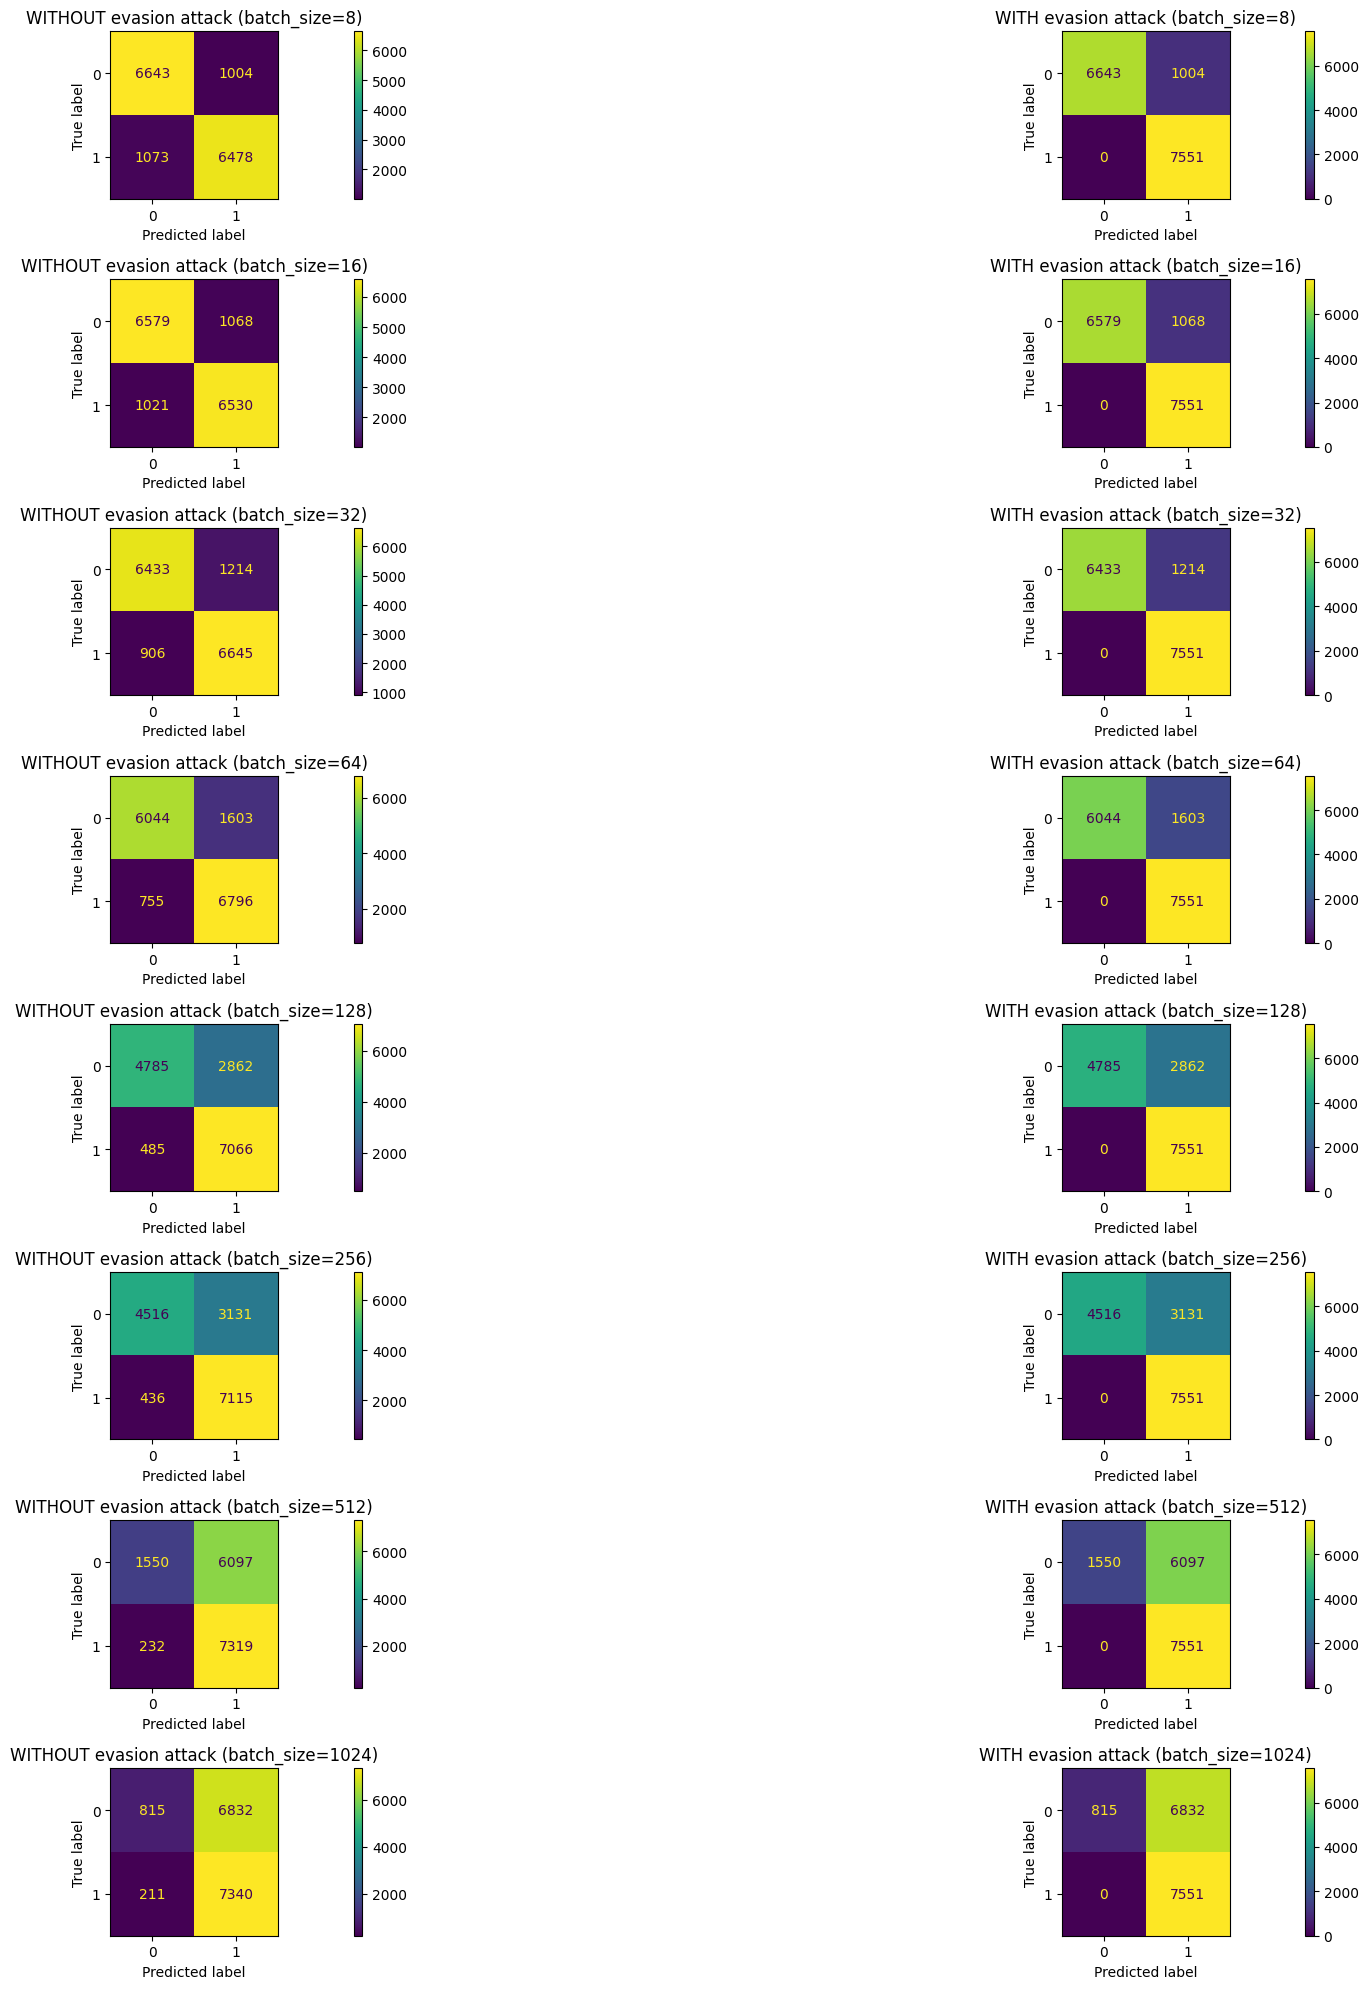

In [105]:
_, ax = plt.subplots(len(batch_sizes), 2, figsize=(25, 20))

for i, batch_size in enumerate(batch_sizes):
    y_pred = trained_models[i].predict(X_test)
    y_pred_evaded = trained_models[i].predict(X_test_evaded)

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax[i, 0])
    ax[i, 0].set_title(f'WITHOUT evasion attack (batch_size={batch_size})')
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_evaded, ax=ax[i, 1])
    ax[i, 1].set_title(f'WITH evasion attack (batch_size={batch_size})')
plt.tight_layout()
plt.show()

In [106]:
table = Table(title="SGDClassifier Test with data without and with evasion attack on different batches")
table.add_column("Evasion Attack", justify="center", style="cyan")
table.add_column("Batch Size", justify="center", style="red")
table.add_column("Accuracy", style="magenta")
table.add_column("Precision", style="magenta")
table.add_column("Recall", style="magenta")
table.add_column("F1", style="magenta")
table.add_column("TP", style="green")
table.add_column("TN", style="green")
table.add_column("FP", style="green")
table.add_column("FN", style="green")

types = ["No", "Yes"]


for i, batch_size in enumerate(batch_sizes):
    y_pred = trained_models[i].predict(X_test)
    y_pred_evaded = trained_models[i].predict(X_test_evaded)
    preds_type = [y_pred, y_pred_evaded]

    for i, type_test in enumerate(types):
        tn, fp, fn, tp = confusion_matrix(y_test, preds_type[i], labels=[0, 1]).ravel()
        acc = accuracy_score(y_test, preds_type[i])
        precision = precision_score(y_test, preds_type[i])
        recall = recall_score(y_test, preds_type[i])
        f1_res = f1_score(y_test, preds_type[i])
        res_tuple = (type_test, f"{batch_size}", f"{acc:.3f}", f"{precision:.3f}", f"{recall:.3f}", f"{f1_res:.3f}", f"{tp}", f"{tn}", f"{fp}", f"{fn}")
        table.add_row(*res_tuple)

console = Console()
console.print(table)

         SGDClassifier Test with data without and with evasion attack on different batches         
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┓
┃ Evasion Attack ┃ Batch Size ┃ Accuracy ┃ Precision ┃ Recall ┃ F1    ┃ TP   ┃ TN   ┃ FP   ┃ FN   ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━┩
│       No       │     8      │ 0.863    │ 0.866     │ 0.858  │ 0.862 │ 6478 │ 6643 │ 1004 │ 1073 │
│      Yes       │     8      │ 0.934    │ 0.883     │ 1.000  │ 0.938 │ 7551 │ 6643 │ 1004 │ 0    │
│       No       │     16     │ 0.863    │ 0.859     │ 0.865  │ 0.862 │ 6530 │ 6579 │ 1068 │ 1021 │
│      Yes       │     16     │ 0.930    │ 0.876     │ 1.000  │ 0.934 │ 7551 │ 6579 │ 1068 │ 0    │
│       No       │     32     │ 0.861    │ 0.846     │ 0.880  │ 0.862 │ 6645 │ 6433 │ 1214 │ 906  │
│      Yes       │     32     │ 0.920    │ 0.861     │ 1.000  │ 0.926 │ 7551 │ 6433 │ 1214 │ 0    │
│       No       │     64     │ 0.845    │ 0.809     │ 0.900  │ 0.852 │ 6796 │ 6044 │ 1603 │ 755  │
│      Yes       │     64     │ 0.895    │ 0.825     │ 1.000  │ 0.904 │ 7551 │ 6044 │ 1603 │ 0    │
│       No       │    128     │ 0.780    │ 0.712     │ 0.936  │ 0.809 │ 7066 │ 4785 │ 2862 │ 485  │
│      Yes       │    128     │ 0.812    │ 0.725     │ 1.000  │ 0.841 │ 7551 │ 4785 │ 2862 │ 0    │
│       No       │    256     │ 0.765    │ 0.694     │ 0.942  │ 0.800 │ 7115 │ 4516 │ 3131 │ 436  │
│      Yes       │    256     │ 0.794    │ 0.707     │ 1.000  │ 0.828 │ 7551 │ 4516 │ 3131 │ 0    │
│       No       │    512     │ 0.584    │ 0.546     │ 0.969  │ 0.698 │ 7319 │ 1550 │ 6097 │ 232  │
│      Yes       │    512     │ 0.599    │ 0.553     │ 1.000  │ 0.712 │ 7551 │ 1550 │ 6097 │ 0    │
│       No       │    1024    │ 0.537    │ 0.518     │ 0.972  │ 0.676 │ 7340 │ 815  │ 6832 │ 211  │
│      Yes       │    1024    │ 0.550    │ 0.525     │ 1.000  │ 0.689 │ 7551 │ 815  │ 6832 │ 0    │
└────────────────┴────────────┴──────────┴───────────┴────────┴───────┴──────┴──────┴──────┴──────┘

#### Epoch accuracy on test data over time

**WARNING:** this may take over an hour to complete.

In [130]:
# Hardening accuracy collection
epochs_count = 200
batch_size = 16
accuracies_harden = []

sgd_clf = SGDClassifier(loss="log_loss", random_state=0, n_jobs=-1)
sgd_clf.fit(X_train, y_train)
for epoch in track(range(epochs_count)):
    X_train_shuffled, y_train_shuffled = shuffle(X_train_harden, y_train_harden, random_state=epoch)
    for j in range(0, len(X_train_harden), batch_size):
        sgd_clf.partial_fit(X_train_shuffled[j:j+batch_size], y_train_shuffled[j:j+batch_size], classes=[0, 1])
    y_pred = sgd_clf.predict(X_test_evaded)
    acc = accuracy_score(y_test, y_pred)
    accuracies_harden.append(acc)

Output()

In [131]:
# Non-negative model accuracy collection
accuracies_nonnegative = []
batch_size = 16

clf = SGDClassifier(loss="log_loss", random_state=0, n_jobs=-1, verbose=0)
for i in track(range(epochs_count)):
    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=i)
    for j in range(0, len(X_train), batch_size):
        clf.partial_fit(X_train_shuffled[j:j+batch_size], y_train_shuffled[j:j+batch_size], classes=[0, 1])
        clf.coef_[0] = weight_clip(clf.coef_[0])
    y_pred = clf.predict(X_test_evaded)
    acc = accuracy_score(y_test, y_pred)
    accuracies_nonnegative.append(acc)

Output()

In [132]:
# Comibation of hardening and Non-negative model accuracy collection
accuracies_combi = []
batch_size = 16

clf_combi = SGDClassifier(loss="log_loss", random_state=0, n_jobs=-1, verbose=0)
clf_combi.fit(X_train, y_train)
for i in track(range(epochs_count)):
    X_train_shuffled, y_train_shuffled = shuffle(X_train_harden, y_train_harden, random_state=i)
    for j in range(0, len(X_train_harden), batch_size):
        clf_combi.partial_fit(X_train_shuffled[j:j+batch_size], y_train_shuffled[j:j+batch_size], classes=[0, 1])

    X_train_shuffled, y_train_shuffled = shuffle(X_train, y_train, random_state=i)
    for j in range(0, len(X_train), batch_size):
        clf_combi.partial_fit(X_train_shuffled[j:j+batch_size], y_train_shuffled[j:j+batch_size], classes=[0, 1])
        clf_combi.coef_[0] = weight_clip(clf_combi.coef_[0])
    y_pred = clf_combi.predict(X_test_evaded)
    acc = accuracy_score(y_test, y_pred)
    accuracies_combi.append(acc)

Output()

In [144]:
def annot_max(x, y, xytext, text, ax=None):
    x_val = np.array(x)
    y_val = np.array(y)
    xmax = x_val[np.argmax(y_val)] + 1
    ymax = y_val.max()
    text = f"(epoch={xmax}, accuracy={ymax:.3f}), {text}"
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=xytext, **kw)

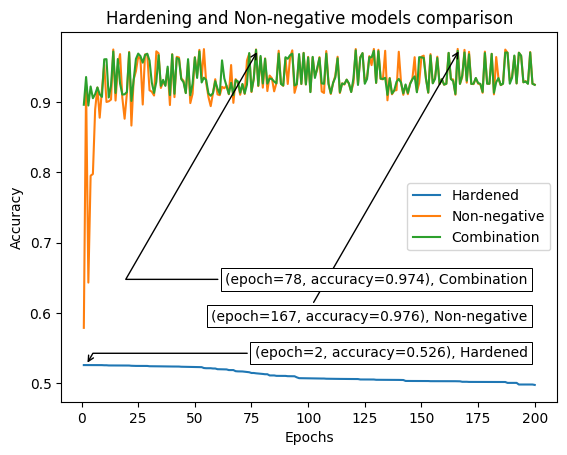

In [145]:
epochs_list = [i+1 for i in range(epochs_count)]
plt.plot(epochs_list, accuracies_harden, label='Hardened')
annot_max(epochs_list, accuracies_harden, (0.94, 0.15), 'Hardened')
plt.plot(epochs_list, accuracies_nonnegative, label='Non-negative')
annot_max(epochs_list, accuracies_nonnegative, (0.94, 0.25), 'Non-negative')
plt.plot(epochs_list, accuracies_combi, label='Combination')
annot_max(epochs_list, accuracies_combi, (0.94, 0.35), 'Combination')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Hardening and Non-negative models comparison')

plt.legend()

plt.show()

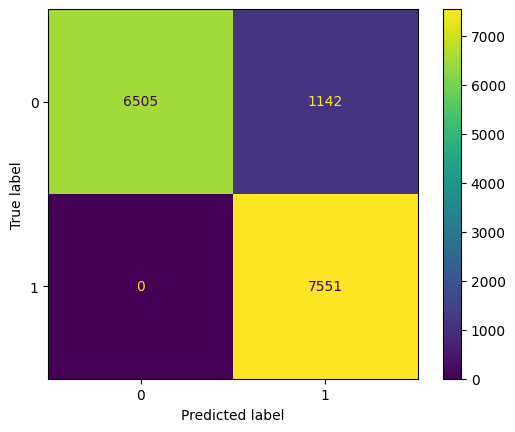

In [135]:
y_pred_non_neg = clf.predict(X_test_evaded)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_non_neg)
plt.show()

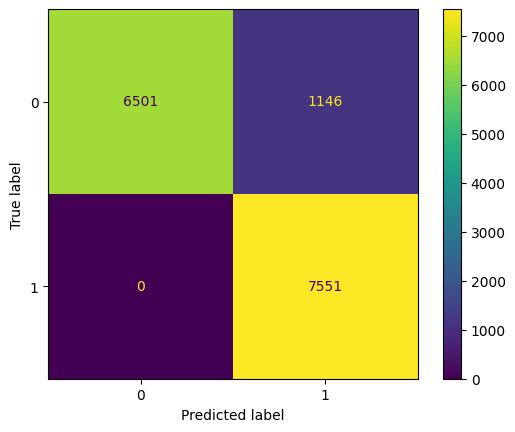

In [136]:
y_pred_combi = clf_combi.predict(X_test_evaded)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_combi)
plt.show()

### 4b. Analysis and answers to the questions.

As we can see from the first results, we can see that if we perform `partial_fit()` on whole data in one epoch, we can see that the model seems learn not classify to detect benign files and therefore resulted in a lot of false positives i.e. recall of `1.0` but a percision of `0.497`. Hence, we decided to first perform an experiment on training the model on smaller batch sizes that were in the powers of `2` as there are two classes. These were: `[8, 16, 32, 64, 128, 256, 512, 1024]`. From the experimets, we can see that we can achive the one of the better accuracy scores with the one of the smaller amounts of False positives at batch size `16` and that for every evaded test data, we can see that there are no false negatives. Also, from these experiments we can tell that the model is more robust than the regular and hardened models. To make sure there is no order bias, we implemented shuffling to the data. After that, we trained tree models: hardened, non-negative and model that combines both techniques for `200` epoch.

From the epoch experiment, we can see that non-negative model outperforms the hardened model drastically as setting weights to between `[0, inf)` as it stabalises training as large weight updates are prevented whereas with regular hardening, we train the network to its convergence limit and apply a small subset of "hardened" data which causes to overfit the accuracy to drop. The combination and non-negative model start to fluctuate at around 10th epoch and the combination model has a better head start (as it used to imporve and already trained model), it gets outperformed by the non-negative model. Combi model seems overfitting on hardened data and clipping seem to cancel each other out which causes to have a little more False Positives than negative model.

## 5. Bonus: robust decision trees for fraud detection (5 Points)

### 5a. Train and analyze a regular decision tree for fraud detection

### 5b. Train and analyze a robust decision tree (GROOT) for fraud detection

### 5c. Evaluate the robustness of the two models